# Table of Contents
01. Importing Libraries and Data
02. Data Cleaning
03. Data Prep For Regression Analysis
04. Regression Analysis

After running the regression model on the full dataset, I decided to look closer at the relationships between carrier delay count and arrival delay minutes as in 6.2 the correlation heatmap showed a strong positive correlation.

## 1. Importing Libraries and Data

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#define path
path = r'C:\Users\legra\Desktop\08-2022 Airline Delays Analysis'

In [8]:
#import data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'wrangled_v3.csv'))

In [9]:
df.head()

,Unnamed: 0,year,month,carrier,carrier_name,airport name,code,city,state_code,arriving_flight_count,...,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes,state
0,0,2021,12,9E,Endeavor Air Inc.,Lehigh Valley International,ABE,Allentown/Bethlehem/Easton,PA,127,...,2.95,0,0,264,119,0,68,0,77,Pennsylvania
1,1,2021,12,9E,Endeavor Air Inc.,Southwest Georgia Regional,ABY,Albany,GA,73,...,1.87,0,0,342,125,0,142,0,75,Georgia
2,2,2021,12,9E,Endeavor Air Inc.,Alexandria International,AEX,Alexandria,LA,62,...,1.15,0,0,439,156,0,103,0,180,Louisiana
3,3,2021,12,9E,Endeavor Air Inc.,Augusta Regional at Bush Field,AGS,Augusta,GA,166,...,2.74,0,1,1266,291,693,167,0,115,Georgia
4,4,2021,12,9E,Endeavor Air Inc.,Albany International,ALB,Albany,NY,52,...,0.82,0,0,497,278,180,21,0,18,New York


## 2. Data Cleaning

In [6]:
# Check for missing values

df.isnull().sum()

year                                 0
month                                0
carrier                              0
carrier_name                         0
airport name                         0
code                                 0
city                                 0
state                                0
arriving_flight_count                0
arrival_delayed_15_minutes_more    173
carrier_delay_count                  0
weather_delay_count                  0
nas_delay_count                      0
security_delay_count                 0
late_aircraft_count                  0
arrival_cancelled_count              0
arrival_diverted_count               0
arrival_delay_minutes                0
carrier_delay_minutes                0
weather_delay_minutes                0
nas_delay_minutes                    0
security_delay_minutes               0
late_aircraft_delay_minutes          0
dtype: int64

Values indicaes flight that did not have a delay of 15 minutes or more

In [7]:
dups = df.duplicated()

In [8]:
dups.shape 

(38701,)

No duplicates

In [19]:
#select only entries with a non-zero arrival delayed 15 min more
df =df[df['arrival_delayed_15_minutes_more'] >= 1]

## 3. Data prep for Regression Analsis

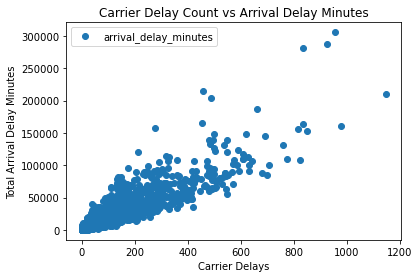

In [37]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'carrier_delay_count', y='arrival_delay_minutes',style='o') 
plt.title('Carrier Delay Count vs Arrival Delay Minutes')  
plt.xlabel('Carrier Delays')  
plt.ylabel('Total Arrival Delay Minutes')  
plt.show()

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['carrier_delay_count'].values.reshape(-1,1)
y = df['arrival_delay_minutes'].values.reshape(-1,1)

In [39]:
X

array([[2.51],
       [5.02],
       [2.63],
       ...,
       [1.79],
       [0.  ],
       [7.79]])

In [40]:
y

array([[ 264],
       [ 342],
       [ 439],
       ...,
       [ 352],
       [  47],
       [1446]], dtype=int64)

In [41]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [42]:
# Create a regression object.

regression = LinearRegression()

In [43]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

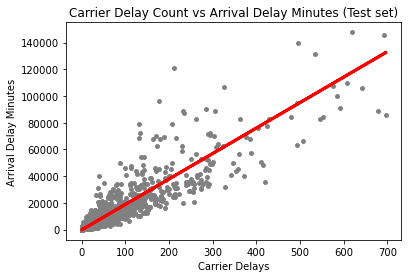

In [45]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Carrier Delay Count vs Arrival Delay Minutes (Test set)')
plot_test.xlabel('Carrier Delays')
plot_test.ylabel('Arrival Delay Minutes')
plot_test.show()

In [46]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [47]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[190.75606968]]
Mean squared error:  9547792.94750795
R2 score:  0.831335163261822


In [48]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,357,952.137670
1,57,-283.961661
2,1123,562.995288
3,1958,4437.251064
4,371,288.306548
5,837,-11.180481
6,18362,32903.779342
7,122,-283.961661
8,718,1242.086896
9,0,-283.961661
